# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Load a dataset
carData = pd.read_csv('/content/drive/MyDrive/CS-430/Datasets/CarData.csv')

In [ ]:
# Check data
carData.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [ ]:
#Get data shape
carData.shape

(11914, 16)

In [ ]:
#Get datatypes
carData.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [ ]:
#Missing value count
carData.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [ ]:
#Summary of numerical cols
carData.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

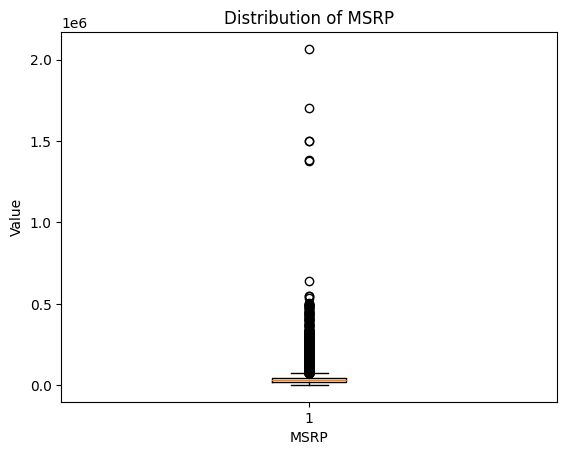

In [ ]:
#Show outliers of MSRP
plt.boxplot(carData['MSRP'])
plt.xlabel('MSRP')
plt.ylabel('Value')
plt.title('Distribution of MSRP')
plt.show()

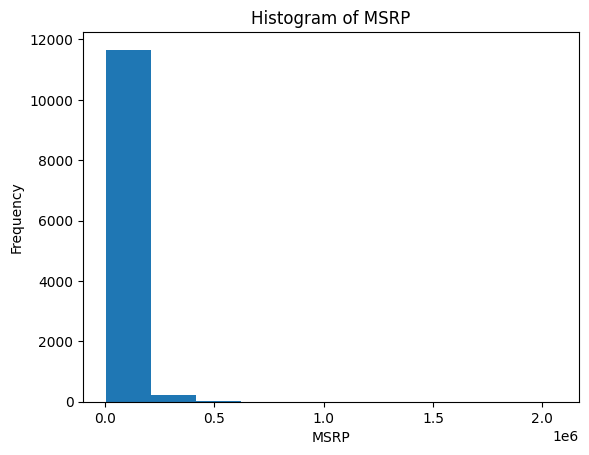

In [ ]:
#Show distribution of MSRP
plt.hist(carData['MSRP'], bins=10)
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('Histogram of MSRP')
plt.show()

### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

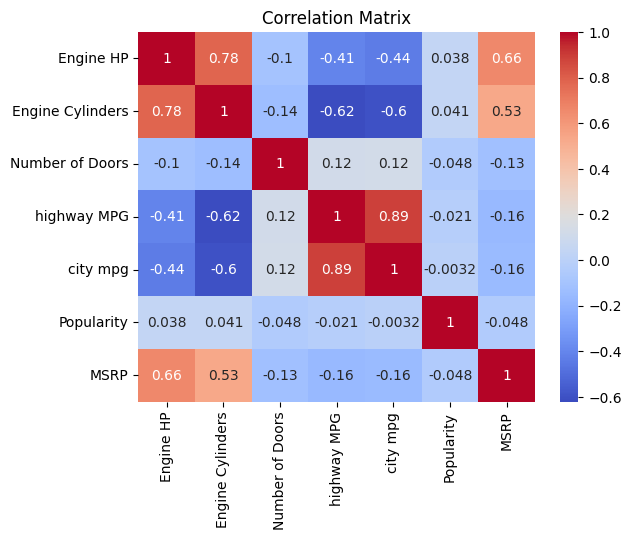

In [ ]:
#Show correlation between numerical features excluding year
corr = carData.select_dtypes(include=['float64','int64']).drop(columns='Year').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

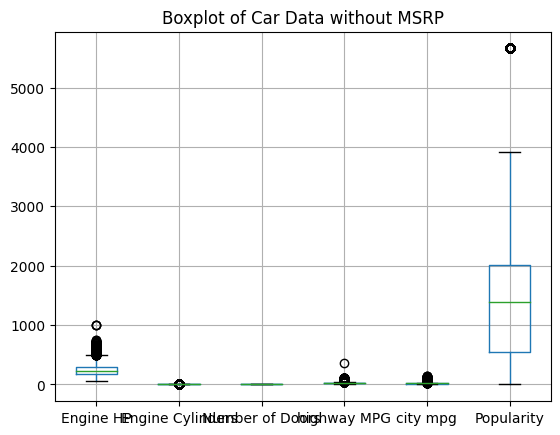

In [ ]:
#Show outliers of data exculding MSRP
carData.select_dtypes(include=['float64','int64']).drop(columns='Year')
carData.select_dtypes(include=['float64','int64']).drop(columns='Year').drop(columns='MSRP').boxplot()
plt.title('Boxplot of Car Data without MSRP')
plt.show()

In [ ]:
#Detect other outliers with IQR
numerical_cols = carData.select_dtypes(include=['float64','int64']).drop(columns='Year')
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3-Q1
outliers = numerical_cols[((numerical_cols<(Q1-1.5*IQR))|(numerical_cols>(Q3+1.5*IQR))).any(axis=1)]
outliers

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
135,180.0,4.0,4.0,45,32,3916,39000
140,180.0,4.0,4.0,43,31,3916,43450
142,180.0,4.0,4.0,43,31,3916,41000
146,180.0,4.0,4.0,42,32,3916,39850
161,180.0,4.0,4.0,42,32,3916,40250
...,...,...,...,...,...,...,...
11737,320.0,8.0,2.0,24,15,1624,86215
11810,106.0,4.0,4.0,40,32,2031,17050
11903,394.0,8.0,2.0,19,12,3916,128000
11904,394.0,8.0,2.0,19,12,3916,130000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


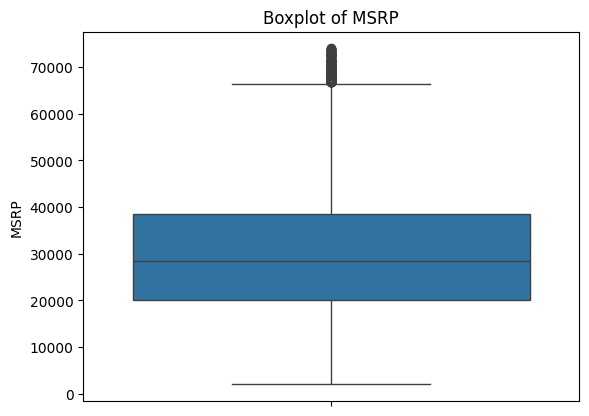

In [ ]:
#Drop outliers from data
carData = carData.drop(outliers.index)

#Show updated MSRP
sns.boxplot(carData['MSRP'])
plt.title('Boxplot of MSRP')
plt.show()

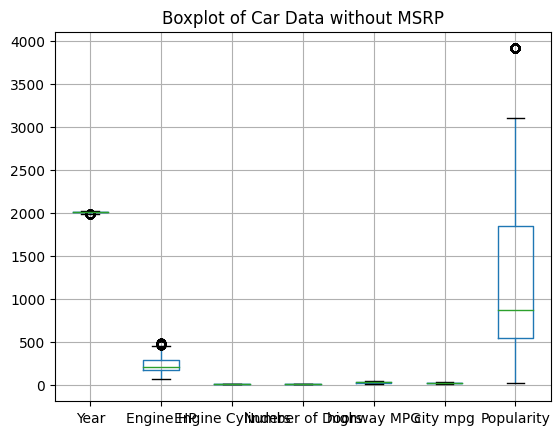

In [ ]:
#Show updated numerical cols
carData.drop(columns="MSRP").boxplot()
plt.title('Boxplot of Car Data without MSRP')
plt.show()


### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [ ]:
#Count duplicates
carData.duplicated().sum()

637

In [ ]:
#Remove duplicates
carData.drop_duplicates(inplace=True)
carData.duplicated().sum()

0

## Scale MSRP with Standard Scaler

In [ ]:
#Scale target
scaler = StandardScaler()
carData['MSRP'] = scaler.fit_transform(carData[['MSRP']])
carData['MSRP']

,MSRP
0,1.049061
1,0.703849
2,0.433219
3,-0.001049
4,0.316784
...,...
11909,1.048117
11910,1.712106
11911,1.331335
11912,1.350216


### Split into features and target

In [ ]:
#data_no_outlier.info()
X = carData.drop(columns='MSRP', axis=1)
y = carData['MSRP']

### Feature Engineering

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9067 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               9067 non-null   object 
 1   Model              9067 non-null   object 
 2   Year               9067 non-null   int64  
 3   Engine Fuel Type   9064 non-null   object 
 4   Engine HP          9056 non-null   float64
 5   Engine Cylinders   9047 non-null   float64
 6   Transmission Type  9067 non-null   object 
 7   Driven_Wheels      9067 non-null   object 
 8   Number of Doors    9067 non-null   float64
 9   Market Category    6036 non-null   object 
 10  Vehicle Size       9067 non-null   object 
 11  Vehicle Style      9067 non-null   object 
 12  highway MPG        9067 non-null   int64  
 13  city mpg           9067 non-null   int64  
 14  Popularity         9067 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 1.1+ MB


In [ ]:
# Identify numerical and categorical columns
numerical_features = ["Year","Engine HP","Engine Cylinders","Number of Doors","highway MPG","city mpg", "Popularity"]
categorical_features = ["Make","Model","Engine Fuel Type","Transmission Type","Driven_Wheels","Market Category","Vehicle Size","Vehicle Style"]


### Preprocessing Pipelines

In [ ]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

### Create a function to build and evaluate models using pipelines

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [ ]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=0.05))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.05))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=50000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [ ]:
for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 0.0475
R² Score: 0.9528
--------------------------------------------------
Model: Ridge
Mean Squared Error: 0.0473
R² Score: 0.9530
--------------------------------------------------
Model: Lasso
Mean Squared Error: 0.2400
R² Score: 0.7618
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 0.1177
R² Score: 0.8832
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 0.0922
R² Score: 0.9085
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

Both the Linear Regression and Ridge models preformed the best, with the lowest MSE values around 0.047 and R^2 values of 0.95. The second best model was the Polynomial REgression with a MSE of 0.092 and an R^2 of 0.9. The third best model was the SDGRegression with a MSE of 0.117 and an R^2 of 0.88. Finally, the worst model was the Lasso model with the highest MSE of 0.24 and the lowest R^2 at 0.76

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.